# MODELS

In [3]:
import numpy as np
import pandas as pd

X_train = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/X_train_3", index_col=0)
X_test = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/X_test_3", index_col=0)

y_train = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/y_train", index_col=0)
y_test = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/y_test", index_col=0)

In [4]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Normalization

In [5]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

## Logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")

model_LR.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [5]:
predictions_LR = model_LR.predict(X_test)

In [6]:
predictions_proba_LR = model_LR.predict_proba(X_test)

In [7]:
model_LR.score(X_train, y_train)

0.5673214842531962

In [8]:
model_LR.score(X_test, y_test)

0.5537540533798953

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.28      0.75      0.41       815
           1       0.89      0.50      0.64      3194

    accuracy                           0.55      4009
   macro avg       0.58      0.63      0.52      4009
weighted avg       0.77      0.55      0.59      4009



In [10]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, predictions_LR)
print(c_matrix)

[[ 615  200]
 [1589 1605]]


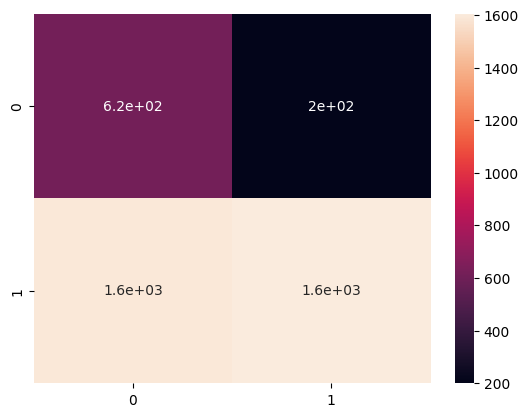

In [11]:
import seaborn as sns

sns.heatmap(c_matrix, annot=True);

## Decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(max_depth=15, random_state=42)

model_DT.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
model_DT_predictions = model_DT.predict(X_test)

In [14]:
model_DT_proba = model_DT.predict_proba(X_test)

In [15]:
model_DT.score(X_train, y_train)

0.8569379482382289

In [16]:
model_DT.score(X_test, y_test)

0.7478174108256423

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_DT_predictions))

              precision    recall  f1-score   support

           0       0.28      0.16      0.20       815
           1       0.81      0.90      0.85      3194

    accuracy                           0.75      4009
   macro avg       0.55      0.53      0.53      4009
weighted avg       0.70      0.75      0.72      4009



## VECTORES MACHINES (SVC)

In [ ]:
# SVM LINEAR

from sklearn.svm import SVC

model_SVC = SVC(kernel="linear", C=1, class_weight= 'balanced')

model_SVC.fit(X_train, y_train)

model_SVC_predictions = model_SVC.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_SVC_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.28      0.78      0.41       815
           1       0.89      0.47      0.62      3194

    accuracy                           0.54      4009
   macro avg       0.59      0.63      0.51      4009
weighted avg       0.77      0.54      0.58      4009



In [34]:
# SVM RBF
from sklearn.svm import SVC

model_SVC = SVC(kernel = "rbf", gamma=0.7, C=1.0, class_weight= 'balanced')

model_SVC.fit(X_train, y_train)

model_SVC_predictions = model_SVC.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_SVC_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.28      0.41      0.33       815
           1       0.83      0.73      0.77      3194

    accuracy                           0.66      4009
   macro avg       0.55      0.57      0.55      4009
weighted avg       0.72      0.66      0.68      4009



### Balanceado de muestras

In [23]:
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos por clase y creación de diccionario para uso en modelos
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

In [24]:
# APLICACIÓN DE SMOTE

from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)


In [25]:
# MODELO TREE DECISSION

model_DT.fit(X_resampled, y_resampled)


,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
model_DT_predictions = model_DT.predict(X_test)

print(classification_report(y_test, model_DT_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.28      0.29      0.29       815
           1       0.82      0.81      0.81      3194

    accuracy                           0.70      4009
   macro avg       0.55      0.55      0.55      4009
weighted avg       0.71      0.70      0.71      4009



In [27]:
# APLICACIÓN DE ADASYN

from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = ADASYN(random_state=42).fit_resample(X_train, y_train)

In [28]:
#MODELO TREE DECISSION

model_DT.fit(X_resampled, y_resampled)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## MODELO KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k = 2
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.46      0.33       815
           1       0.83      0.67      0.74      3194

    accuracy                           0.63      4009
   macro avg       0.55      0.57      0.54      4009
weighted avg       0.71      0.63      0.66      4009



# PIPELINES

In [32]:
# Load libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight

# class weight calculating
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Set random seed
np.random.seed(0)

pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])


logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear', class_weight=class_weights_dict),
                   LogisticRegression(max_iter=100, solver='liblinear', class_weight=class_weights_dict)],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state': [42]
}

random_forest_params = {
    'classifier': [RandomForestClassifier(class_weight="balanced")],
    'classifier__max_depth': [15, 30],
    'classifier__n_estimators': [200, 500],
    'classifier__random_state': [42]
}

svm_param = {
    'classifier': [svm.SVC(probability=True, class_weight=class_weights_dict)],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__C': [0.1, 1, 10]
}

search_space = [
    logistic_params,
    random_forest_params,
    svm_param
]

# RandomizedSearchCV
clf = GridSearchCV(
    estimator=pipe, 
    param_grid= search_space,          
    cv=3,                
    n_jobs=-1,
    verbose=1
)


In [1]:
model_gridsearch_1= clf.fit(X_train, y_train)

NameError: name 'clf' is not defined

In [34]:
predictions_best_estimator = model_gridsearch_1.best_estimator_.predict(X_test)

In [35]:
print(classification_report(y_test, predictions_best_estimator))

              precision    recall  f1-score   support

           0       0.32      0.22      0.26       815
           1       0.82      0.88      0.85      3194

    accuracy                           0.74      4009
   macro avg       0.57      0.55      0.55      4009
weighted avg       0.71      0.74      0.73      4009



## Red neuronal

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[64]))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 200)            │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,201 (129.69 KB)

 Trainable params: 33,201 (129.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size= 32, validation_split=0.1)

Epoch 1/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7966 - loss: 0.4829 - val_accuracy: 0.8017 - val_loss: 0.4682
Epoch 2/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.4702 - val_accuracy: 0.8005 - val_loss: 0.4669
Epoch 3/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.4654 - val_accuracy: 0.8005 - val_loss: 0.4665
Epoch 4/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.4622 - val_accuracy: 0.8005 - val_loss: 0.4686
Epoch 5/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8011 - loss: 0.4599 - val_accuracy: 0.7986 - val_loss: 0.4705
Epoch 6/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8017 - loss: 0.4572 - val_accuracy: 0.7986 - val_loss: 0.4731
Epoch 7/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4546 - val_accuracy: 0.7949 - val_loss: 0.4758
Epoch 8/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8024 - loss: 0.4521 - val_accuracy: 0.

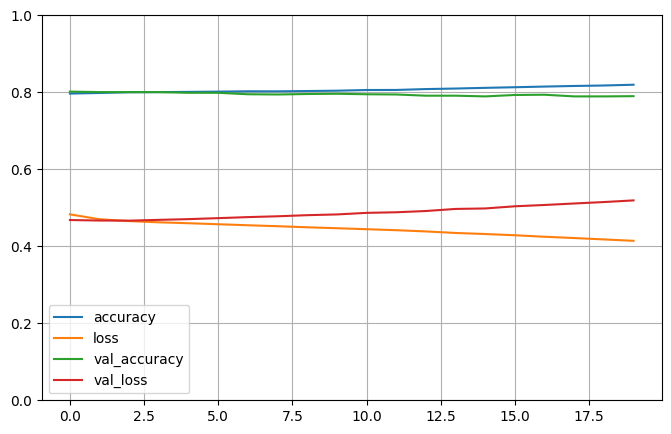

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
results = model.evaluate(X_test, y_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.5349


In [22]:
predictions = model.predict(X_test)
y_pred = (predictions > 0.5).astype(int).ravel()

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.13      0.19       815
           1       0.81      0.95      0.88      3194

    accuracy                           0.78      4009
   macro avg       0.61      0.54      0.53      4009
weighted avg       0.73      0.78      0.74      4009

